<a href="https://colab.research.google.com/github/praharsha701/Machine-Learning/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""Linear Regression for house price prediction. Here price is the y variable(output variable). The data for this is present in sklearn package. 
The data is about the factors that effect the price predition in boston country.
We load "load_boston" from sklearn dataset to use in this project. We created a object called "boston" to save that data."""

from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
#We are printing the data that we loaded to check what the data actually consists.
#explanation of the raw data is present in "raw data details of boston" file.

boston #this statement is similar to print(boston).

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [3]:
#the data we have is raw. For our convience we organise this data into tabular format.For this we import pandas library and use the DataFrame() method.
#we assign this tabular data to the variable called data. The table is formed only on the independent variable(x) i.e only on the factors for the price prediction.

import pandas as pd

data = pd.DataFrame(boston.data)#we use dataframe() to create tables in python
data #this statement is equal to print(data)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
#We got the data into tabular format but the column names are numbers. To get the column names we assign the feature names from the raw data to the tabular data.

data.columns = boston.feature_names #this gives column names to the table extracted using dataframe() method.

In [5]:
data.head()#this returns only the first five rows with the column names

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
#The tabular data now contains only the factors i.e X variable. We need the output also to train the model(Y variable). So we add the price column to 
#the table from the raw data of boston.

data['price'] = boston.target#adds a column called price to the table.Here price is the Y variable.
data 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [7]:
#let's see some insights of data
data.shape #this gives the shape of table - rows and columns.

(506, 14)

In [8]:
type(data) #this says the type of the data

pandas.core.frame.DataFrame

In [9]:
data.dtypes#shows the datatypes of the column values

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
price      float64
dtype: object

In [10]:
data.isnull().sum()
#checks whether the data have any null values in the table. If it has null values in the table then it returns the count of the null values present, with respect to the columns.
#The sum() helps in returning the count.

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [11]:
data.describe()
#this describes the data - count,mean,max,min,standard etc.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
#Now we have the data in tabular format convient to us. We now corelate every column with another and see how they are related. This is done by corr() method.

corr = data.corr()#compares the columns and corelates the columns
corr.shape
#this is equivalent to the statement print(corr.shape).this prints the shape of the corelation.As corelation is made between the columns so it forms a matrix 
#of size of no.of columns.

(14, 14)

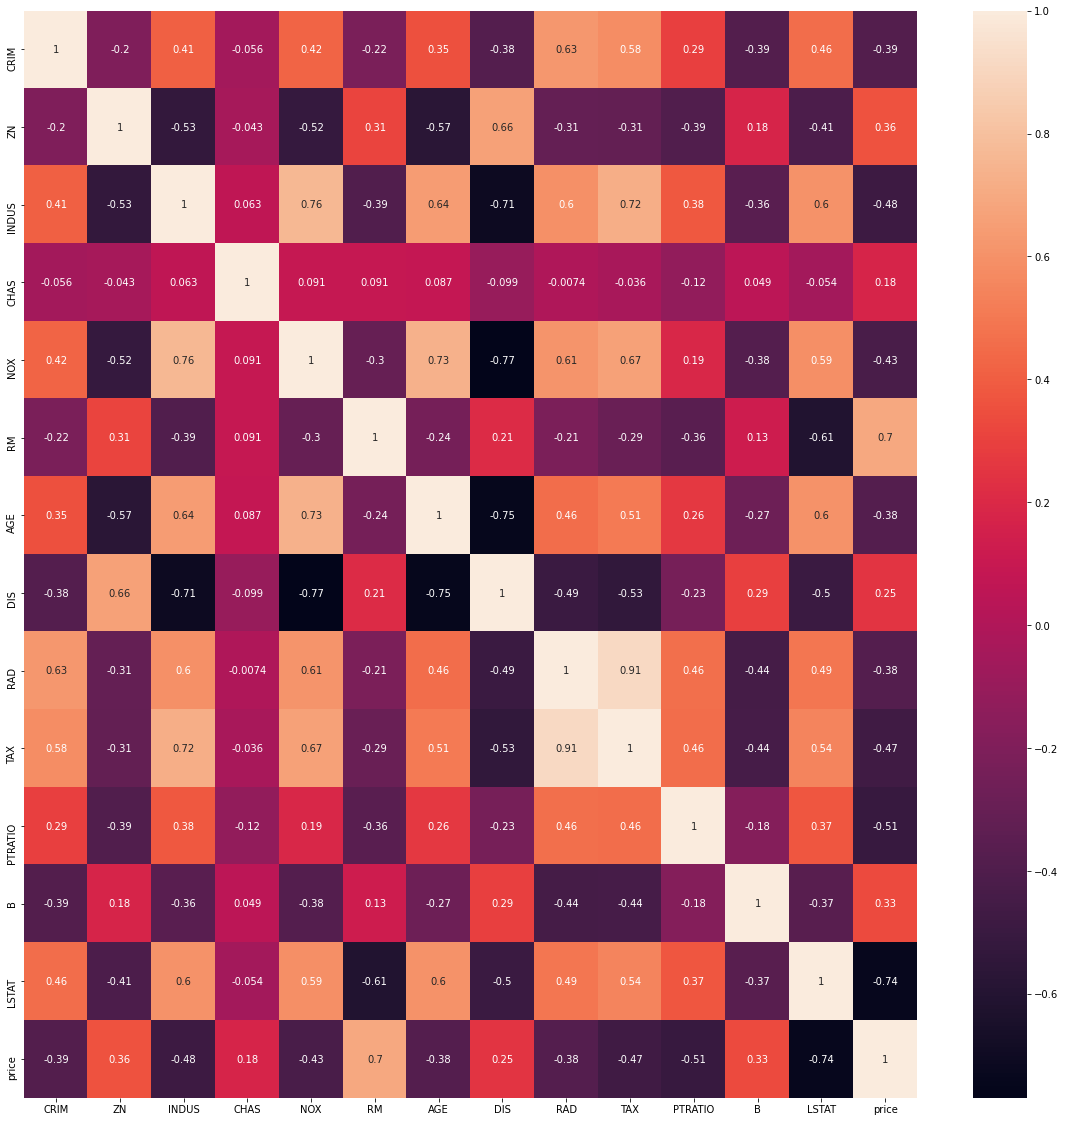

In [13]:
#To visualize the data we have we use matplotlib and seaborn libraries.Here we are visualizing the corelated data.

import matplotlib.pyplot as plt
import seaborn as sns#these libraries are used for visualization
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)#we need to consider the positive values from the graph shown below.Positive values indicate good corelation.

In [14]:
#linear regression in python
#now as the data is ready we now start linear regression.To do linear regression we need input and output(x,y).
#the x variable consists the factors and the y variable consists the price.
x = data.drop(['price'],axis = 1)
x #this statement is simialr to print(x)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [15]:
y = data['price'] #this is y variable i.e price.
y#similar to print(y).

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

In [16]:
#the data is ready but we can't use the whole data for training the model. We need some data to even test the model. 
#So we split the data we have into training data and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)#splits the data we have into two sets. 
#test_size denotes how much data we need to seperate for testing.

In [17]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()#here lm is the instance variable for the model we want to train.
lm.fit(x_train,y_train)#fit() method is used to train the model.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_pred = lm.predict(x_test) #we as we trained the model using fit() method, we check the model using the test data of x. 
#Predict() method is used to predict the output on the test data.
y_pred  #similar to print(y_pred).

array([28.92401278, 30.95393224, 15.64730468, 19.84753304, 28.87961248,
       18.60190125, 13.76163529, 40.50112099, 25.53451937, 19.37011289,
        6.40842093, 33.89789986, 19.67499499, 23.97318123, 18.58777012,
       32.65838764, 25.2406379 , 24.00666822, 13.59279487, 39.79465846,
       25.21316552, 25.0760076 , 23.21839174, 39.77742618, 16.83261897,
       25.07978546, 25.46088144, 26.18381633, 17.03531841, 21.16972581,
       20.34040485, 12.94656381, 14.22724673, 31.76929813, 19.50103774,
       26.34553436, 26.37308598, 32.59516887, 18.43421813, 22.02605111,
       19.17356306, 30.79175176, 34.30661765, 35.25356881, 18.90016237,
       31.51318676, 25.77663203, 31.9686408 , 40.75103873,  9.26964386,
       19.66364493, 15.72229462, 27.40646626, 17.89398543, 16.00343493,
       24.81625391, 31.45198005, 10.70271494, 13.30915087, 17.68206025,
       24.43037854, 25.59208494,  9.595943  , 16.05271838,  3.63048738,
       21.92520466, 20.58575615,  8.17281763, 13.91971475, 10.47

In [19]:
print(x_test)#the x values used for testing.We used 102 rows out of 506 for testing.

        CRIM    ZN  INDUS  CHAS    NOX  ...   RAD    TAX  PTRATIO       B  LSTAT
302  0.09266  34.0   6.09   0.0  0.433  ...   7.0  329.0     16.1  383.61   8.67
55   0.01311  90.0   1.22   0.0  0.403  ...   5.0  226.0     17.9  395.93   4.81
133  0.32982   0.0  21.89   0.0  0.624  ...   4.0  437.0     21.2  388.69  15.03
102  0.22876   0.0   8.56   0.0  0.520  ...   5.0  384.0     20.9   70.80  10.63
253  0.36894  22.0   5.86   0.0  0.431  ...   7.0  330.0     19.1  396.90   3.54
..       ...   ...    ...   ...    ...  ...   ...    ...      ...     ...    ...
225  0.52693   0.0   6.20   0.0  0.504  ...   8.0  307.0     17.4  382.00   4.63
393  8.64476   0.0  18.10   0.0  0.693  ...  24.0  666.0     20.2  396.90  15.17
46   0.18836   0.0   6.91   0.0  0.448  ...   3.0  233.0     17.9  396.90  14.15
300  0.04417  70.0   2.24   0.0  0.400  ...   5.0  358.0     14.8  390.86   6.07
298  0.06466  70.0   2.24   0.0  0.400  ...   5.0  358.0     14.8  368.24   4.97

[102 rows x 13 columns]


In [20]:
print(y_pred)
print(x_test)

[28.92401278 30.95393224 15.64730468 19.84753304 28.87961248 18.60190125
 13.76163529 40.50112099 25.53451937 19.37011289  6.40842093 33.89789986
 19.67499499 23.97318123 18.58777012 32.65838764 25.2406379  24.00666822
 13.59279487 39.79465846 25.21316552 25.0760076  23.21839174 39.77742618
 16.83261897 25.07978546 25.46088144 26.18381633 17.03531841 21.16972581
 20.34040485 12.94656381 14.22724673 31.76929813 19.50103774 26.34553436
 26.37308598 32.59516887 18.43421813 22.02605111 19.17356306 30.79175176
 34.30661765 35.25356881 18.90016237 31.51318676 25.77663203 31.9686408
 40.75103873  9.26964386 19.66364493 15.72229462 27.40646626 17.89398543
 16.00343493 24.81625391 31.45198005 10.70271494 13.30915087 17.68206025
 24.43037854 25.59208494  9.595943   16.05271838  3.63048738 21.92520466
 20.58575615  8.17281763 13.91971475 10.47199184 14.45286414 23.35565168
 34.90634659 16.36051494 16.87625405 34.73740763 35.00988892 11.67854622
 22.33883258 36.11916095 32.06626002 25.26631058 23.

In [21]:
#we need to know the accuracy of the model we trained.We use score() method for this.
lm.score(x_test,y_test)#says accuracy of the model.

#the linear regression for house price prediction is done.

0.79341710039368